In [1]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('Save_Combined_Model.h5')
# summarize model.
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 33)]              0         
                                                                 
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 model_1 (Functional)        (None, 1)                 4225      
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Load the data and the saved model
df = pd.read_csv('new credit card dataset.csv')

In [3]:
df['Time_Day'] = df['Time'] / 3600 / 24
df['Time_Sin'] = np.sin(2 * np.pi * df['Time'] / 86400)
df['Time_Cos'] = np.cos(2 * np.pi * df['Time'] / 86400)
df['Amount_Day'] = df.groupby('Time_Day')['Amount'].transform('mean')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Sin,Time_Cos,Amount_Day
0,145250,-0.550678,-0.429004,-1.291893,-0.414409,-0.292229,0.071843,2.426068,-0.212730,0.412374,...,-0.036281,-0.110610,-0.098380,0.095985,460.71,0,1.681134,-0.907838,-0.419320,264.355000
1,145250,1.846910,0.143301,-1.171846,1.570946,0.076854,-0.858130,0.164378,-0.251494,0.442113,...,-0.014024,-0.705045,0.044595,0.000922,68.00,0,1.681134,-0.907838,-0.419320,264.355000
2,145251,-0.450863,0.821397,0.986015,4.391073,0.264297,2.722335,-0.864041,1.345993,-1.475872,...,-0.429208,0.645419,0.200152,-0.103724,56.31,0,1.681146,-0.907869,-0.419254,56.310000
3,145253,0.257263,0.663826,0.105009,-0.167841,-0.364902,0.488614,-0.811389,-2.465800,1.038062,...,0.066148,-0.113299,0.447557,0.358055,30.52,0,1.681169,-0.907930,-0.419122,30.246667
4,145253,1.952705,-0.536206,-0.594049,0.276406,-0.332131,0.345709,-0.771184,0.312286,1.066398,...,-0.602074,-0.037594,-0.031744,-0.047976,19.99,0,1.681169,-0.907930,-0.419122,30.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56953,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.436807,0.250034,0.943651,0.823731,0.77,0,1.999838,-0.001018,0.999999,0.770000
56954,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.999850,-0.000945,1.000000,24.790000
56955,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.999861,-0.000873,1.000000,38.940000
56956,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.999861,-0.000873,1.000000,38.940000


In [4]:
from sklearn.preprocessing import StandardScaler,RobustScaler
df['Amount_Day'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_Day'] = RobustScaler().fit_transform(df['Time_Day'].values.reshape(-1, 1))
#df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Sin,Time_Cos,Amount_Day
0,145250,-0.550678,-0.429004,-1.291893,-0.414409,-0.292229,0.071843,2.426068,-0.212730,0.412374,...,-0.036281,-0.110610,-0.098380,0.095985,1.539243,0,-0.967255,-0.907838,-0.419320,1.539243
1,145250,1.846910,0.143301,-1.171846,1.570946,0.076854,-0.858130,0.164378,-0.251494,0.442113,...,-0.014024,-0.705045,0.044595,0.000922,-0.042090,0,-0.967255,-0.907838,-0.419320,-0.042090
2,145251,-0.450863,0.821397,0.986015,4.391073,0.264297,2.722335,-0.864041,1.345993,-1.475872,...,-0.429208,0.645419,0.200152,-0.103724,-0.089162,0,-0.967177,-0.907869,-0.419254,-0.089162
3,145253,0.257263,0.663826,0.105009,-0.167841,-0.364902,0.488614,-0.811389,-2.465800,1.038062,...,0.066148,-0.113299,0.447557,0.358055,-0.193011,0,-0.967021,-0.907930,-0.419122,-0.193011
4,145253,1.952705,-0.536206,-0.594049,0.276406,-0.332131,0.345709,-0.771184,0.312286,1.066398,...,-0.602074,-0.037594,-0.031744,-0.047976,-0.235413,0,-0.967021,-0.907930,-0.419122,-0.235413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56953,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.436807,0.250034,0.943651,0.823731,-0.312806,0,1.182148,-0.001018,0.999999,-0.312806
56954,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.606624,-0.395255,0.068472,-0.053527,-0.216084,0,1.182226,-0.000945,1.000000,-0.216084
56955,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.265745,-0.087371,0.004455,-0.026561,-0.042573,0,1.182304,-0.000873,1.000000,-0.042573
56956,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.569159,0.546668,0.108821,0.104533,-0.275640,0,1.182304,-0.000873,1.000000,-0.275640


In [5]:
X = df.drop(['Time','Class'], axis=1).values
y = df['Class'].values

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
# Make predictions
y_pred = model.predict(X)

1780/1780 [==============================] - 2s 1ms/step


In [8]:
np.savetxt('y_pred.txt',y_pred,delimiter=',')

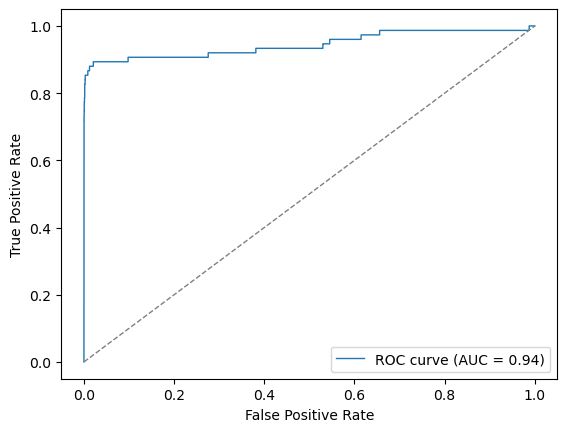

Optimal threshold: 3.7401188e-07
[[4.5921223e-07]
 [2.1402633e-08]
 [4.3339736e-07]
 ...
 [8.2114147e-09]
 [6.6544752e-09]
 [3.0598269e-08]]


In [9]:
import matplotlib.pyplot as plt
# Compute the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Choose a threshold based on the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)
print((y_pred))

In [10]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
y_pred = np.where(y_pred > 0.9999, 1, 0)
cm = confusion_matrix(y,y_pred)
print(cm)

[[56880     3]
 [   25    50]]


Confusion matrix, without normalization
[[56880     3]
 [   25    50]]


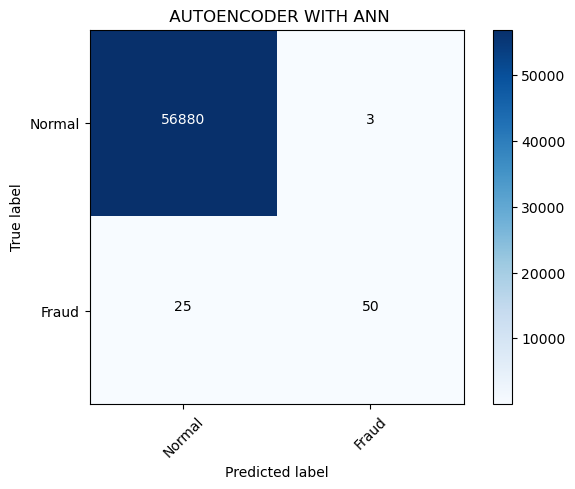

In [11]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']
plot_confusion_matrix(cm=cm, classes=labels, title=' AUTOENCODER WITH ANN')

In [12]:
# Choose a threshold based on the ROC curve
threshold = optimal_threshold

# Flag the transaction as potentially fraudulent if the predicted probability is greater than the threshold
fraud_indices = np.where(y_pred > 0.9999)[0]
df['Fraud'] = 0
df.loc[fraud_indices, 'Fraud'] = 1


# Save the predicted labels in a new CSV file
df.to_csv('Fraud_detection.csv', index=False)